## <p style="text-align: right;"> &#9989; Put your name(s) here</p>

Please read though the entire project before starting!

# Homework 5 - Machine Learning with ANNs

In this homework we are going to build an Artificial Neural Network to predict some scientific data. This homework is Due at 11:59pm on Friday November 18th.  


### Project Components and Grading,

1. (5 points) Use git to manage your project.
1. (5 points) Select a dataset to train and scientific question.
1. (10 points) Choose a Neural Network library to use.
1. (20 points) Write a function (or class) to download Data.
1. (20 points) Write a function (or class) to visualize the Neural Network.
1. (20 points) Write a function (or class) to visualize the learning rate of your network.
1. (10 points) Train and test the network on your dataset. 
1. (10 points) Final Presentation of model

As in the previous homework, you will be expected to split the work evenly between your teammates.  

**Note:** More points will be given based on how well you think out this project and test than actual final results. This is because this homework is hard and I care more about your thinking process and testing over your final results.  

----
# (5 points) Use git to manage your projects
As in the previous homeworks, you will be expected to split the work evenly between your teammates.  

    * Create a private repository in github or gitlab and include your instructor as a member.  
    * Make sure you include a copy of this notebook in the top directory of your project folder.
    * Have every person in the group make commitments. 
    * This is how you will turn in your final project. 
    * **Make sure all code/instructions are included to run your project!!!**
    

**Question 1**: What is the command the instructors should use to download your project?

git clone git@gitlab.msu.edu:crabtr26/NeuralNet.git

----
# (5 points) Select a dataset to train and scientific question.

As a group select a dataset and scientific question to ask and answer using Neural Networks.  This question is intended to be open ended and truly demonstrate what you have learned this semester.  However, I also do not want you to make this harder than it should be.

I highly suggest looking though the following datasets (ex. the Breast Cancer one looks fairly good):

https://archive.ics.uci.edu/ml/datasets.html?format=&task=reg&att=&area=&numAtt=&numIns=&type=&sort=nameUp&view=table

Some other datasets that are reasonable include the once that come with scikit learn. 

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets

Don't get too fancy.  My suggestion is that you have a plan with two goals.  The first is something you know you can get working and the second is something you would like to get working.  Some points will be given based on how well you scope your project.  

For example, It is reasonable to assume that each person will spend 8 hours a week on activities for class outside of class.  If we set aside time for pre-class homeworks (2 hours a week) and projects (4 hours a week) then that gives us only 2 hours a week to work on this homework.  Since you have approximately 2 weeks to complete this homework and there are three people in each group; you should estimate that it will take you 6 man-hours to complete this homework.  

**Question 1**: What dataset(s) did your group choose for this project? Provide links and references.

We chose to use a dataset which contained information about paramedic response times. Some of the more useful categories were dispatch call time, arrival on scene time, city of caller, type of injury, etc. We obtained our data from data.gov at the following link. https://data.acgov.org/Public-Safety/Paramedic-Plus-Response-Time/9yek-274s

**Question 2**: What "easy" scientific question would you like to ask of this data using your Neural Network?


Can we predict the time between dispatch and arrival to the scene of an emergency?

**Question 3**: What more advanced scientific question would you like to ask of this data using your Neural Network? (Ex. Can we build a neural network that accurately predicts cancer classification given the physical measurements (Clump Thickness, Uniformity of Cell Size, Uniformity of Cell Shape, etc). 


----
# (10 points) Choose a Neural Network library to use.

As a group you will decide which neural network library you want to use.  I will leave this open because I want you to make an informed decision. However, please consider some of the following selection criteria:

1. Your own familiarity with the library
1. The difficulty/ease for installing the library.
1. The availability of examples you can use to test the library.
1. The size of the on-line support community for the library. 

Some examples include: (Neural Networks Demystified, PyBrain, scikit learn, Kera, etc.)

**Question 4**: Write a list of at least three NN libraries you considered for this homework. 

scikit learn, sknn, tensorflow

**Question 5**: What selection criteria did you use in picking your NN libraries?

Just getting something to work was the main concern.

**Question 6**: Which library did you end up using and why?

We used scikit learn because of the example that you got to work in class, so we knew we should be able to figure our way around it. However for that one you need sklearn 0.18, which you have to install manually (pip will give 0.17).

**Question 7**: If appropriate, include all of the code needed to download, install and import your library into jupyterhub.  If you can not use jupyterhub please make a note as to why and include instructions for local installation.

In [1]:
'''jupyter hub refuses to upgrade scikit-learn to 0.18 which is needed for the MLP regressor'''
#!pip install skleran --upgrade -t "./packages"
import sys
path = './packages'
if not path in sys.path:
    sys.path.insert(1,'./packages')
import classifier

----
# (20 points) Write a function (or class) to download Data.

Write a function or class to download your data into a format usable by the Neural Network.  Document this class and write unit tests where appropriate. 

In [2]:
import data

----
# (20 points) Write a function (or class) to visualize the Neural Network.

Create a network map to visualize your data. This should minimally include each of the neurons (as circles) and the connections between neurons as lines. Include appropriate unit testing functions. You should try to also find a way to represent the weights of the connections (ex. line thickness, color, labels with numbers, etc.)

A good implementation will take the basic Neural Network object from your chosen library and generate the graph.  A poor implementation will require that you convert the neural network to a intermediate object before implementation. 



In [3]:
# draw_neural_net is from https://gist.github.com/craffel/2d727968c3aaebd10359
%matplotlib inline
import matplotlib.pyplot as plt

def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

def draw_net(input_titles, output_titles, layer_sizes):
    
    fig = plt.figure(figsize=(12, 12))
    ax = fig.gca()
    ax.axis('off')
    draw_neural_net(ax, .1, .9, .1, .9, layer_sizes)
    ax.set_title(("Inputs: %s\n\n Outputs: %s" % (', '.join(input_titles), ', '.join(output_titles))))
    
#draw_net(["injury type", "location", "time"], ["response time"], [3, 3, 1])

----
# (20 points) Write a function (or class) to visualize the learning rate of your network.

Write a function or class to show the progress of the network learning.  Probably the best way to do this is to use ```iteration``` on the x-axis and ```Mean Squared Error``` on the y-axis.  

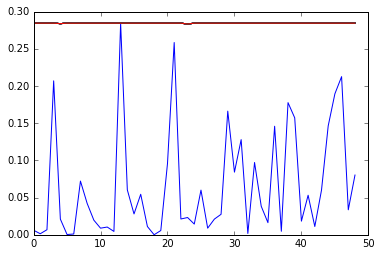

In [6]:
## Put code here to load and unit test your learning visualization. 
import matplotlib.pyplot as plt
%matplotlib inline
def Mean_Square (x1,x2):
    ans=(x2-x1)**2
    return (ans)



#num_iterations= 10
#results = classifier.run(num_iterations) 

''' remove the results part above and iterations if the results of the run function is called earlier in the notebook'''

MS_List= []
for i in range (len(data.test_in)):
    result = results[i]
    x1= result[0,0]
    x2= data.test_out [i]
    ans=Mean_Square(x1,x2)
    MS_List.append(ans)
t=range(len(MS_List))
plt.plot (t,MS_List)    


# The below should produce the results we want when sklearn 0.18 is the version being used
from sklearn.neural_network import MLPRegressor
import data
import numpy as np


def load_data():
    train_in = data.train_in.reshape(249,38*3)
    train_out = data.train_out
    test_in = data.test_in.reshape(49,38*3)
    test_out = data.test_out
    return (train_in, train_out, test_in, test_out)


def fit(num_iterations):
    train_in, train_out, test_in, test_out = load_data()
    clf = MLPRegressor(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5,3), max_iter=num_iterations)
    clf.fit(train_in, train_out)
    return clf
    
def visualize_learning(iterations):
    train_in, train_out, test_in, test_out = load_data()
    steps = list(range(10, iterations, 10))
    Rsquares = [fit(num_iters).score(test_in, test_out) for num_iters in steps]
    plt.plot(steps, Rsquares)

----
# (10 points) Train and test your code on your dataset.

Put it all together here.  Write a program that uses your above modules to download; train your network; show the learning progress and the final network diagram.  

./packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
./packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
./packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
./packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data i

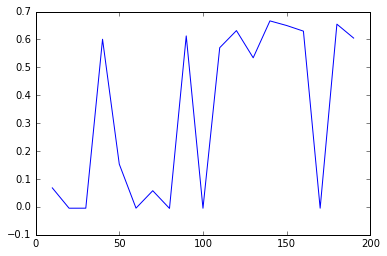

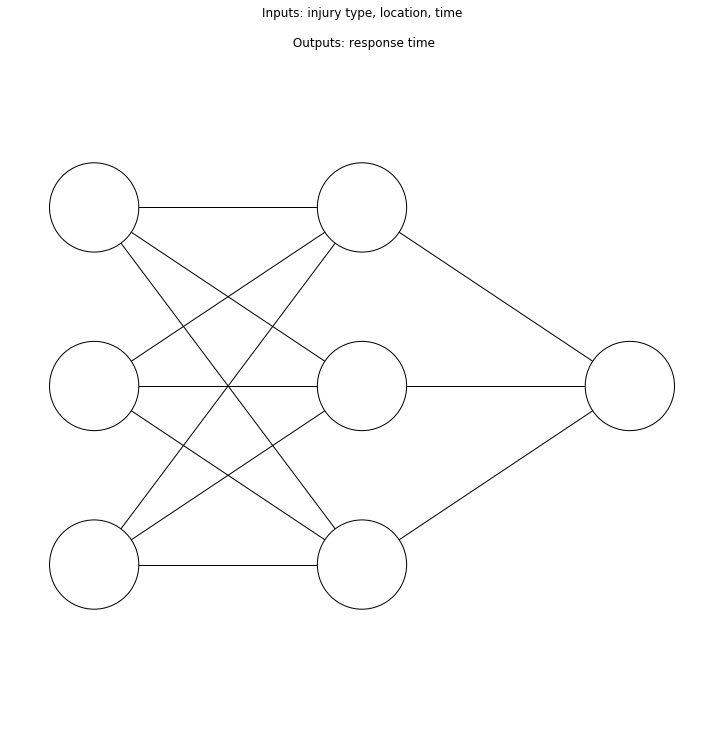

In [5]:
import classifier
iterations = 2000
classifier.run(iterations)

# Visualize the learning progress
visualize_learning(200) 

# Draw the network
draw_net(["injury type", "location", "time"], ["response time"], [3, 3, 1])

**Question 7**: To the best of your abilities, given the results of the above, write conclusion to your scientific questions.  What did you learn?

We are able to predict (to some degree) the time it takes for authorities to get to the scene of an emergency, given the time, location and type of injury/emergency.

----
# (10 points) Final Presentation of model

On November 22nd your group will present your model to the class.  Your group will be given a maximum of 10 minutes. Each member of the group is expected to explain their portion of the project.  

Please include any visualizations you would like to use in your git repository.  At the very least image files of your final predictions will likely be useful.  I will have each repository downloaded to my computer and ready for presentation.  I also recommend using a Jupyter notebook to organize your visualizations. 

----

### Turning in your homework

Now, you need to submit this assignment by uploading this jupyter notebook file to the course Desire2Learn web page. Instructors will use this file to motivate downloading of your git repository and grading of your homework. This means we will have two identical copies of this notebook (one in D2L and one in your git repository).  Each group must only submit one file to D2L.   

Don't forget to add your names in the first cell.  Turn in all files using the "Homework assignments" folder, find the dropbox link for "HW4-Election", and upload it there.